In [2]:
from smr import File
import numpy as np
from matplotlib import pyplot as plt
from kaveh.plots import axvlines


In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'


In [5]:
smr_content = File(f_name)
smr_content.read_channels()


Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [7]:
voltage_chan = smr_content.get_channel(0)
# HE_chan = smr_content.get_channel(1)
# VE_chan = smr_content.get_channel(2)

In [9]:
%%time
from kaveh.sorting.spikesorter import SimpleSpikeSorter

# Time range of data to process:
t_0 = 0 #s
t_end = 55 #s

idx_0 = int(np.round(t_0 / voltage_chan.dt))
idx_end = int(np.round(t_end / voltage_chan.dt))
prange = slice(idx_0, idx_end)
# sss = SimpleSpikeSorter(voltage_chan.data[prange], voltage_chan.dt)
# sss.run()


CPU times: user 52.5 ms, sys: 14.6 ms, total: 67 ms
Wall time: 586 ms


In [48]:
sss.recluster_complex_spikes(freq_range= (0,5000), gmm_nc=4, cov_type='diag', plot_hist=False)


<IPython.core.display.Javascript object>


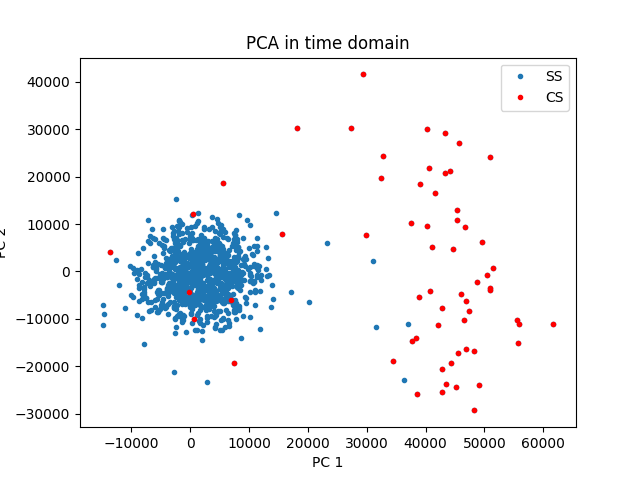

In [49]:
# PCA
from sklearn.decomposition import PCA
from kaveh.toolbox import closest_argmin

pca = PCA(n_components=2)
pca.fit(sss.aligned_spikes - np.mean(sss.aligned_spikes, axis=0))

x_pca = pca.transform(sss.aligned_spikes)
csi = sss.get_cs_spike_indices()
ssi = sss.get_spike_indices()

cs = closest_argmin(csi, ssi)
x_pca_cs = x_pca[cs]

plt.figure()
plt.plot(x_pca[:,0], x_pca[:,1], '.')
plt.plot(x_pca_cs[:,0], x_pca_cs[:,1], 'r.')

plt.title('PCA in time domain')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['SS', 'CS'])

plt.savefig('PCA_time_4c_detected.png')

<IPython.core.display.Javascript object>


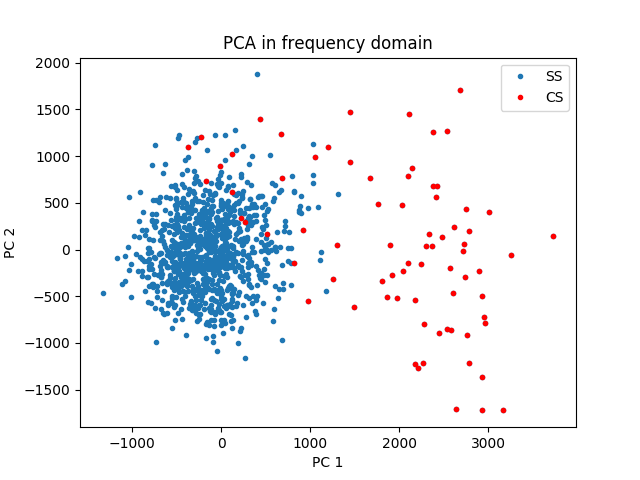

In [20]:
_, fft_power,_20 = sss._find_max_powers()

pca = PCA(n_components=2)
pca.fit(fft_power)

x_pca = pca.transform(fft_power)
csi = sss.get_cs_spike_indices()
ssi = sss.get_spike_indices()

cs = closest_argmin(csi, ssi)
x_pca_cs = x_pca[cs]

plt.figure()
plt.plot(x_pca[:,0], x_pca[:,1], '.')
plt.plot(x_pca_cs[:,0], x_pca_cs[:,1], 'r.')

plt.title('PCA in frequency domain')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['SS', 'CS'])

plt.savefig('PCA_freq.png')

In [12]:
from neo.io import Spike2IO
from kaveh.toolbox import closest_argmin
neo_reader = Spike2IO(filename=f_name)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
# Assuming cs spike trains are saved in the 0th index of spike train channels
cs_spiketrain = np.array(seg.spiketrains[0])
cs_spiketrain = np.int32(cs_spiketrain/voltage_chan.dt)
# cs_spiketrain = cs_spiketrain[np.where(np.logical_and(cs_spiketrain >= idx_0, cs_spiketrain < idx_end))]
# cs_spike_indices = np.unique(closest_argmin(cs_spiketrain, sss.get_spike_indices()))

In [14]:
cs_spiketrain.size

4801

<IPython.core.display.Javascript object>


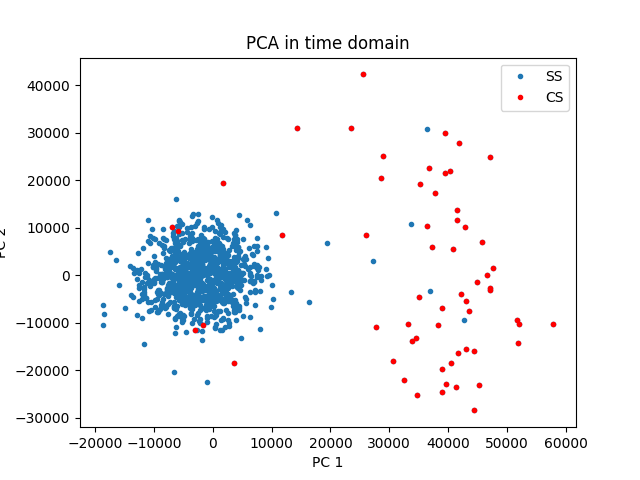

In [50]:
# PCA
from sklearn.decomposition import PCA
from kaveh.toolbox import closest_argmin

pca = PCA(n_components=2)
pca.fit(sss.aligned_spikes )

x_pca = pca.transform(sss.aligned_spikes)
# csi = sss.get_cs_spike_indices()
# csi = cs_spike_indices
ssi = sss.get_spike_indices()

# cs = closest_argmin(csi, ssi)
cs = cs_spike_indices
x_pca_cs = x_pca[cs]

plt.figure()
plt.plot(x_pca[:,0], x_pca[:,1], '.')
plt.plot(x_pca_cs[:,0], x_pca_cs[:,1], 'r.')

plt.title('PCA in time domain')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(['SS', 'CS'])

plt.savefig('PCA_time_labeled.png')